# ToyBrain dataset tutorial:
## How to generate a ToyBrain dataset with a desired `image <--> covariates` relationship ?

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# standard python packages
import os, sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets, linear_model
import random
import math
import json

from create_toybrains import ToyBrainsData
from utils.vizutils import *

the list of image attributes and their possible state can be seen with:

In [ ]:
ToyBrainsData().show_all_states()

## (Step 1) Create a configuration file
that contains, <br>
(a) the list of covariates and labels <br>
(b) the relationship between each covaraite and the image generation attributes <br><br>

The config can be stored in `configs/` folder as shown below:

In [ ]:
! head -30 configs/lbl1cov1_base.py

### Check the configuration

In [ ]:
toy = ToyBrainsData(config='configs.lbl1cov1.py', debug=True)

In [ ]:
toy.show_current_config() # also returns the nodes and connections of the causal graph

the nodes and edges of the causal graph can also be obtained as a list

In [7]:
toy.CGM_nodes, toy.CGM_edges

(['brain-int_fill',
  'cov_site',
  'lbl_lesion',
  'shape-midr_curv',
  'shape-midr_vol-rad'],
 [('cov_site', 'brain-int_fill'),
  ('cov_site', 'lbl_lesion'),
  ('lbl_lesion', 'shape-midr_curv'),
  ('lbl_lesion', 'shape-midr_vol-rad')])

Compare with another more complex config with 5 labels and 3 covariates

In [8]:
# add a tweaking config "lbl5cov3_tweak2.py" that will make the probability distributions 
# extremely distinct for all covariates AND it also creates a link between cov_site and shape-midl_int
toy2 = ToyBrainsData(config='configs.lbl5cov3')

TODO: plot differences in the distributions instead @Jihoon

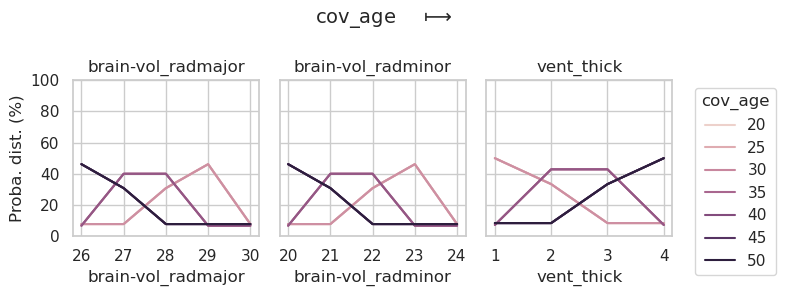

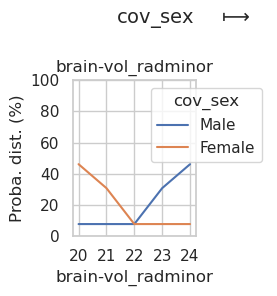

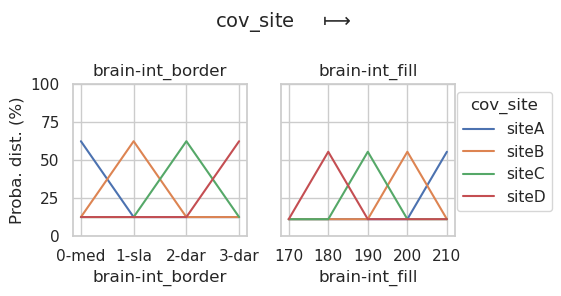

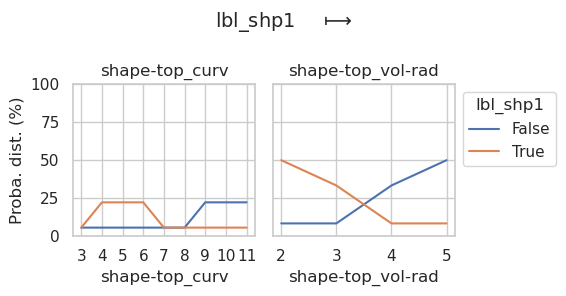

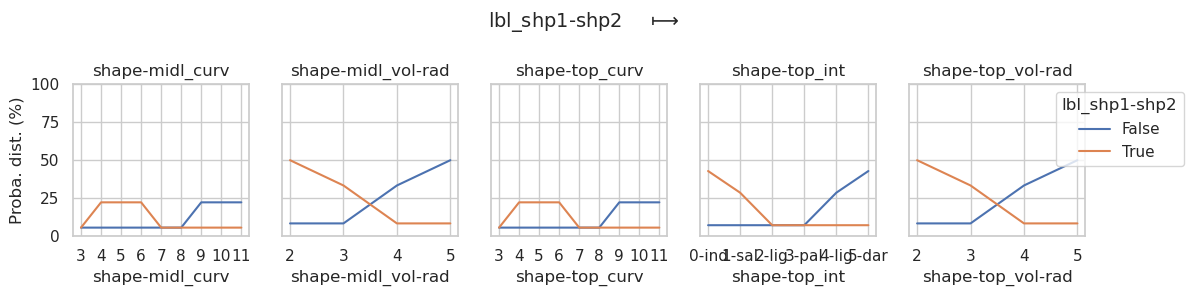

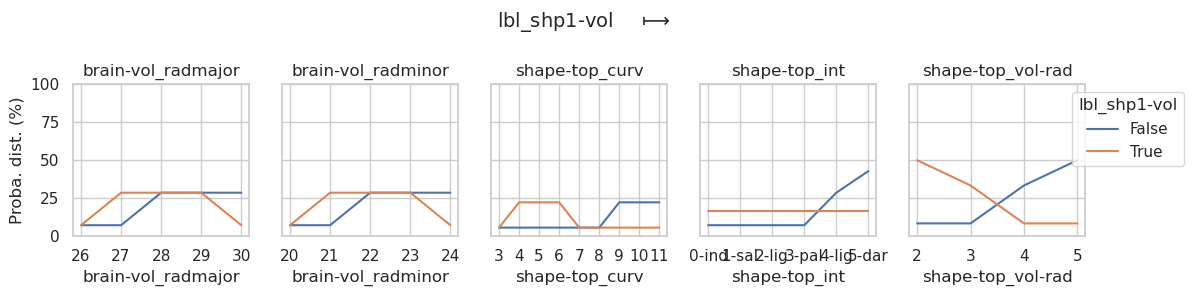

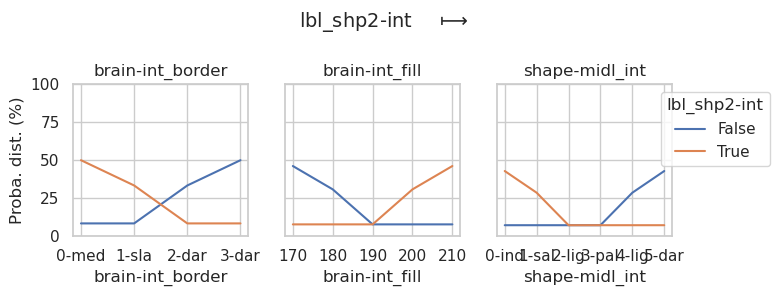

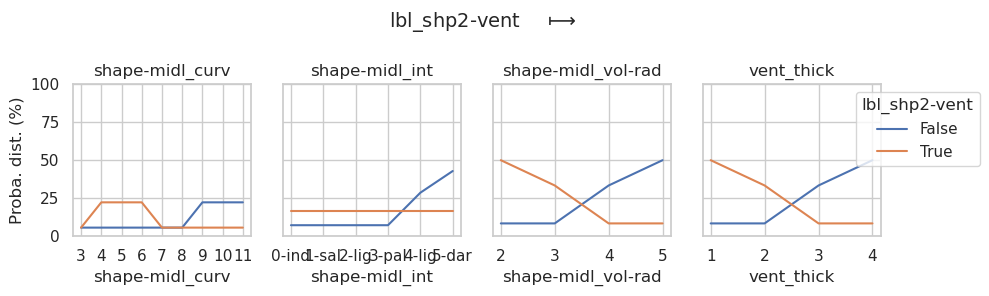

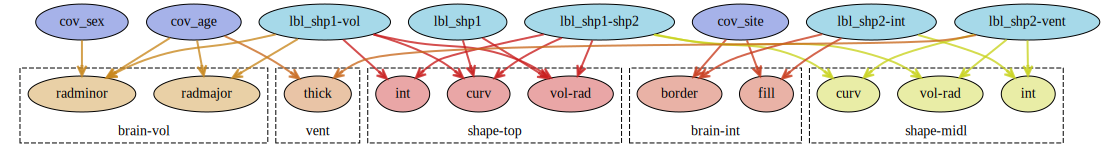

In [9]:
toy2.show_current_config()

## (Step 2) Generate data table 
Sample the dataset and verify how the distributions will look. 
If some distribution isn't as expected then go back to step 1 and edit the config file accordingly.

In [7]:
df = toy.generate_dataset_table(n_samples=1000)

Generative parameter        |        States 
------------------------------------------------------------
brain-vol_radminor         [20 21 22 23 24]
brain-vol_radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain-int_fill             [210 200 190 180 170]
brain-int_border           ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg

100%|##########| 1000/1000 [00:02<00:00, 466.43it/s]


### Visualize the dataframe dist.

In [11]:
df.head()

,cov_site,lbl_lesion,brain-int_border,brain-int_fill,brain-vol_radmajor,brain-vol_radminor,brain_thick,shape-botl_curv,shape-botl_int,shape-botl_vol-rad,...,shape-top_curv,shape-top_int,shape-top_vol-rad,vent_thick,brain-vol,shape-top_vol,shape-midr_vol,shape-midl_vol,shape-botr_vol,shape-botl_vol
subjectID,,,,,,,,,,,,,,,,,,,,,
00000,siteB,True,2-darkslateblue,170,26,20,1,5,2-lightsalmon,3,...,3,5-darkgreen,5,3,1633.628180,64.951905,41.569219,26.450336,11.755705,26.450336
00001,siteB,True,0-mediumslateblue,170,28,22,1,8,1-salmon,4,...,11,5-darkgreen,5,1,1935.221075,77.476453,70.710678,27.000000,23.382686,48.983479
00002,siteB,True,2-darkslateblue,170,29,24,4,3,5-darkgreen,5,...,3,1-salmon,2,4,2186.548487,10.392305,45.254834,27.811529,75.929654,64.951905
00003,siteA,True,0-mediumslateblue,200,29,24,3,9,4-lightgreen,4,...,4,5-darkgreen,4,2,2186.548487,45.254834,45.254834,47.022820,12.360680,49.250901
00004,siteB,True,0-mediumslateblue,180,28,22,1,8,5-darkgreen,5,...,5,3-palegoldenrod,5,3,1935.221075,73.473157,64.951905,26.450336,70.710678,76.536686


#### (a) Viz image attributes vs covariates dist.

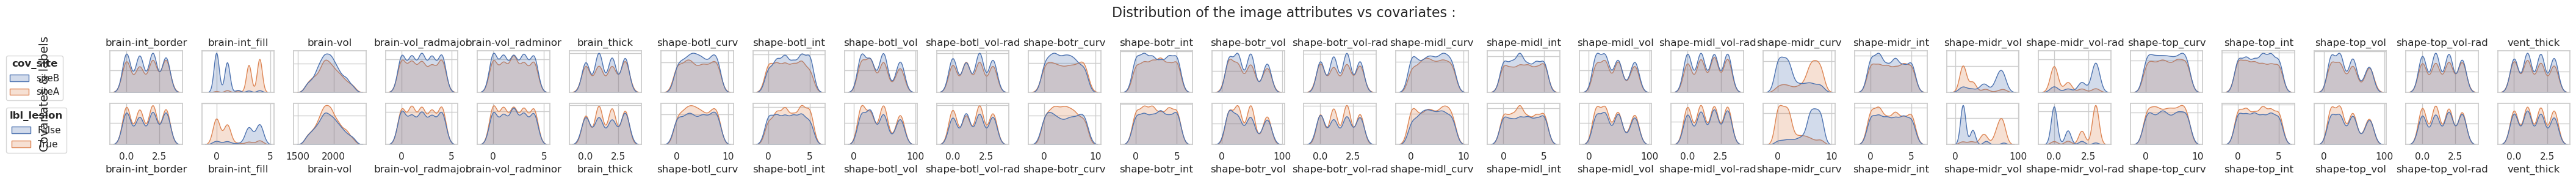

In [12]:
cov_cols = df.filter(regex='^(cov_|lbl_)').columns
attr_cols = df.filter(regex='^(?!(cov_|lbl_)).+').columns
plot_col_dists(df, 
               attr_cols=attr_cols, 
               cov_cols=cov_cols, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

#### (b) Viz dist. of all variables in the dataset

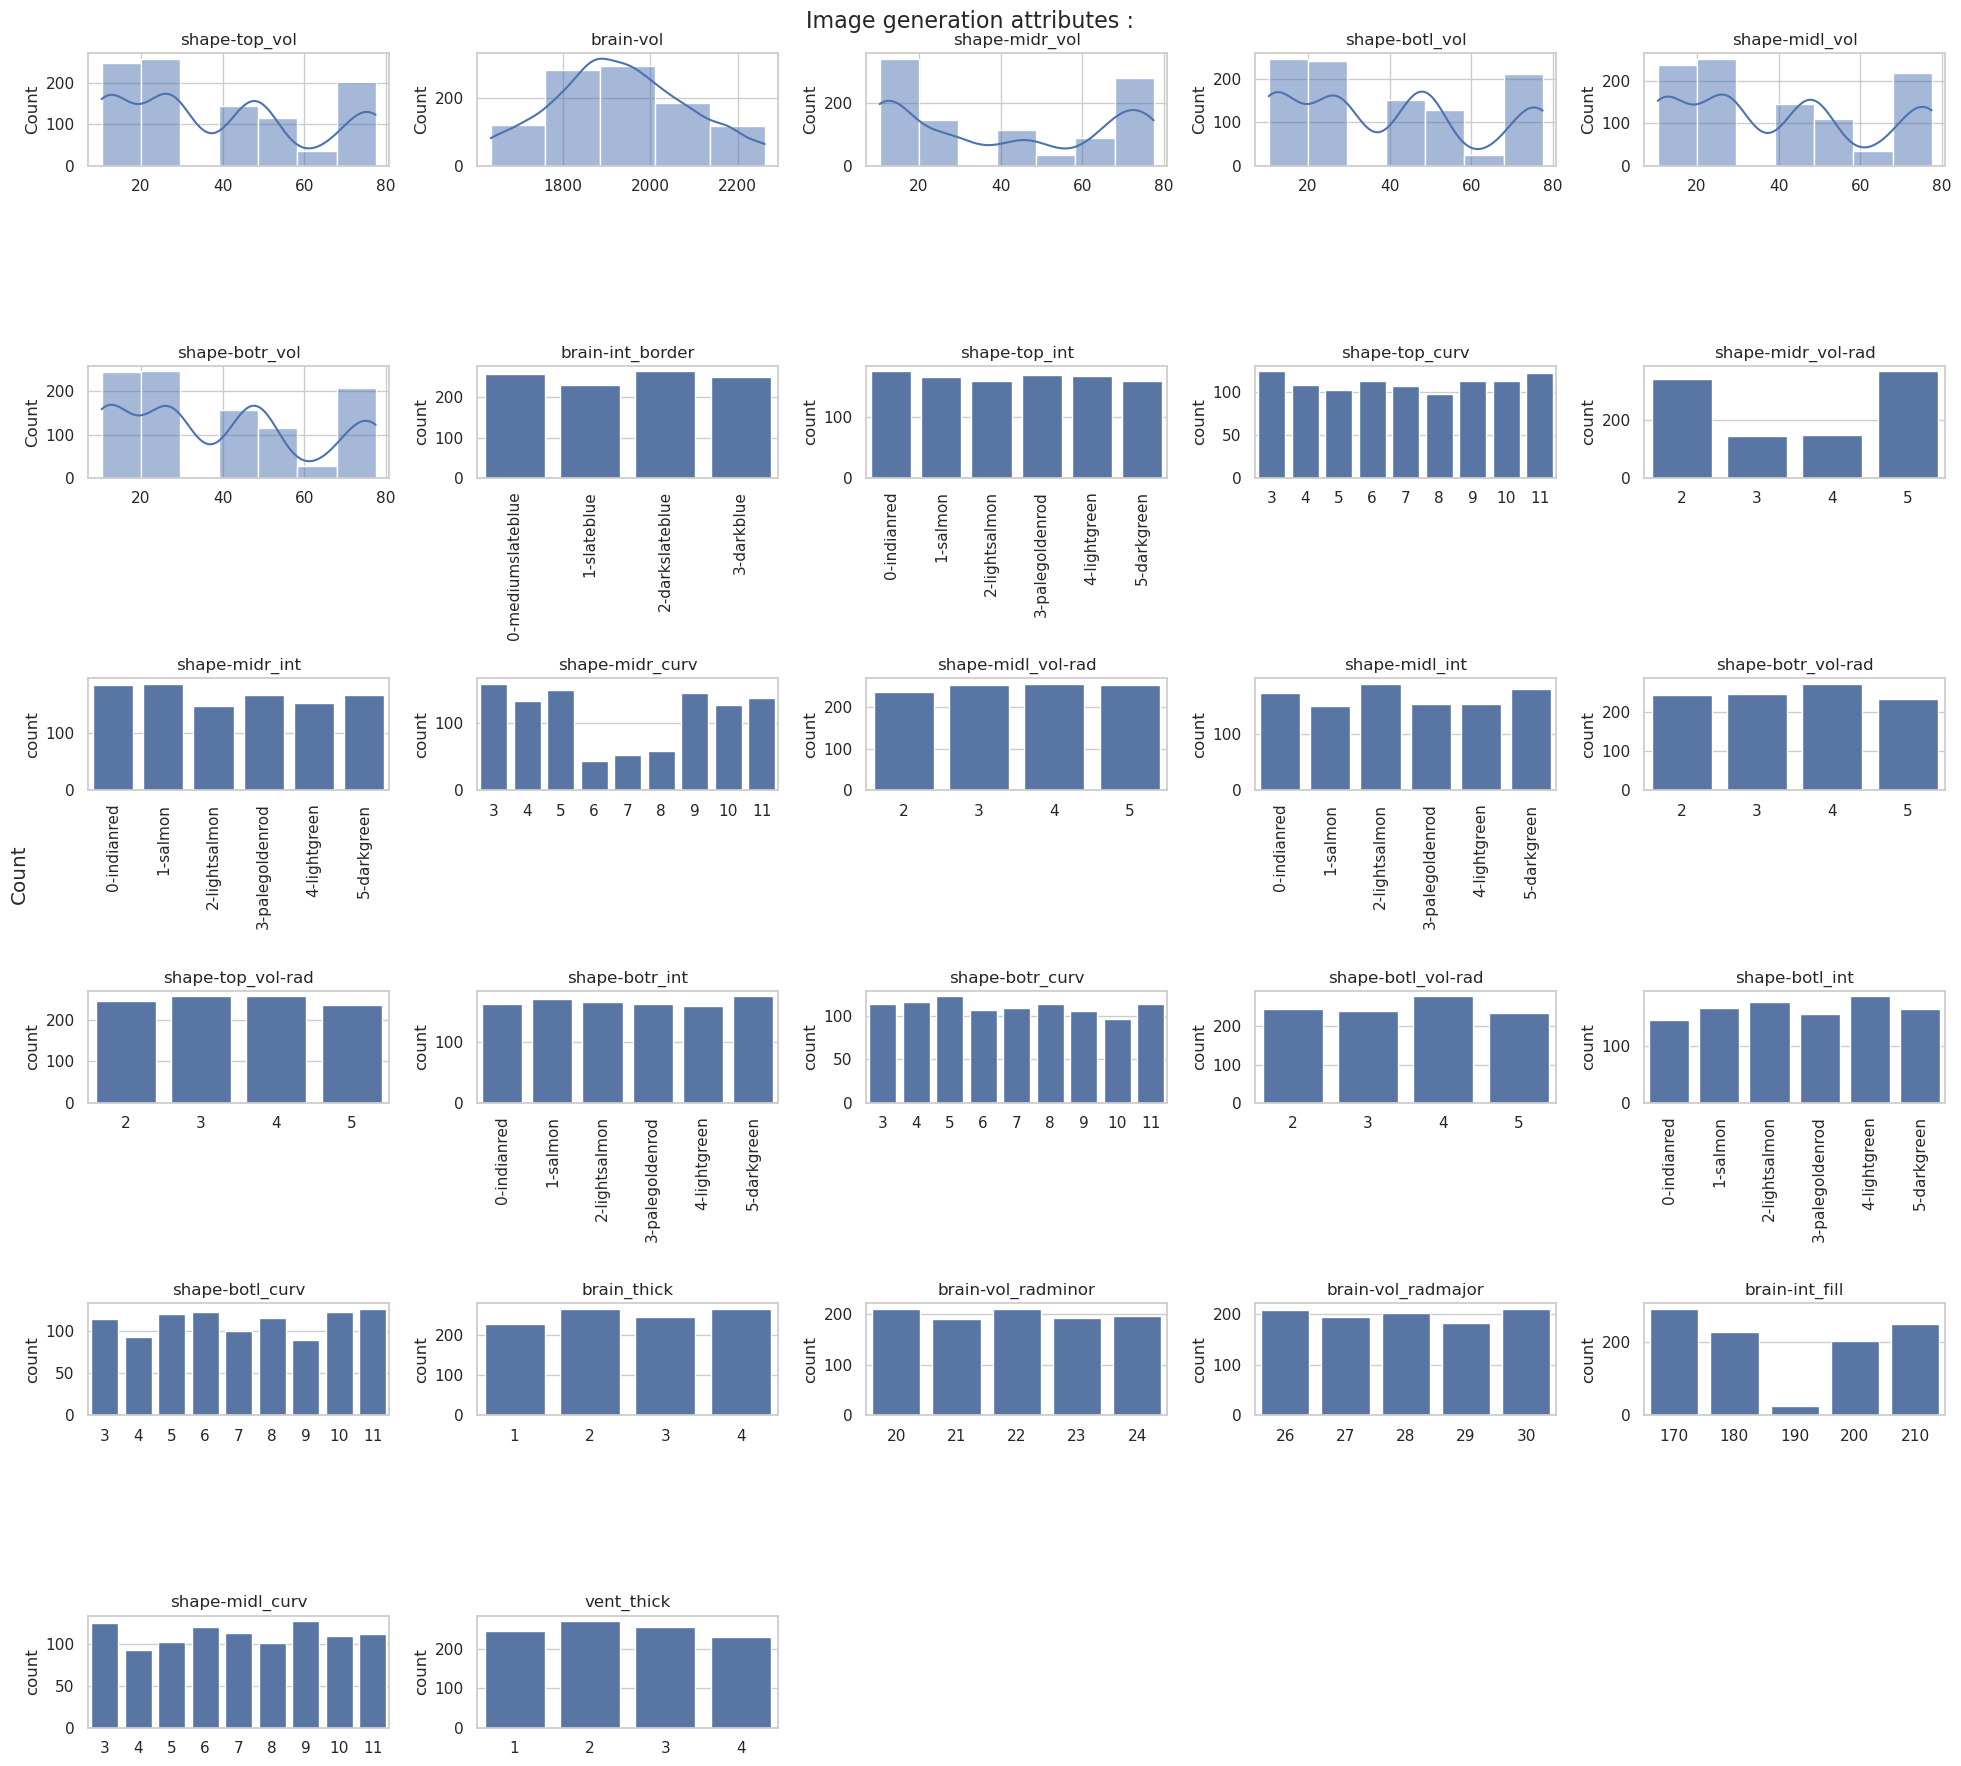

In [13]:
# get all column names starting with 'gen_'
plot_col_counts(df[attr_cols], title="Image generation attributes :")
plt.show()

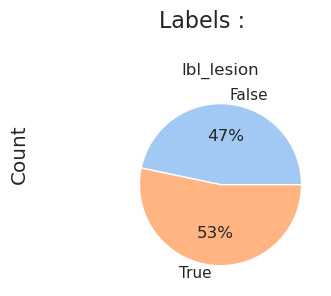

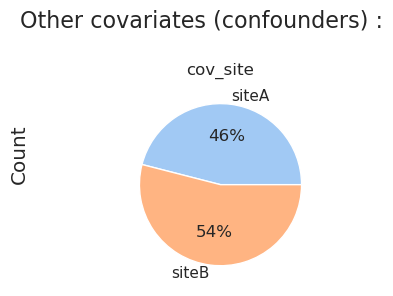

In [14]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^lbl'), title="Labels :")
plt.show()
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^cov_'), title="Other covariates (confounders) :")
plt.show()

## (Step 3) Estimate expected performances
Fit a logistic regression model to predict all labels and covariates from image attributes. <br>
This shows a ground-truth upper bound for the dataset. <br>

In [15]:
df_results = toy.fit_baseline_models(
    input_feature_types=["attr_subsets", "cov_subsets"], 
    debug=False)

running a total of 35 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000


100%|##########| 35/35 [00:04<00:00,  7.49it/s]


TOTAL RUNTIME: 0:00:06


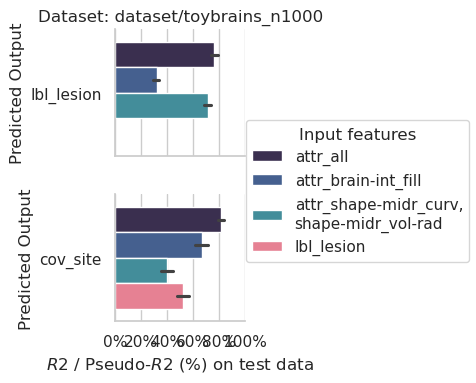

In [16]:
toy.viz_baseline_results(df_results)

We can also inspect the results a bit more such as looking for signs of overfitting <br>
(ratio of train_metric to test_metric

In [17]:
toy._show_baseline_results()

### Compare with the other similar configs
in which the label is harder to predict than before but the confounder is not, making it more likely that the model will pick up on the confounding pathway

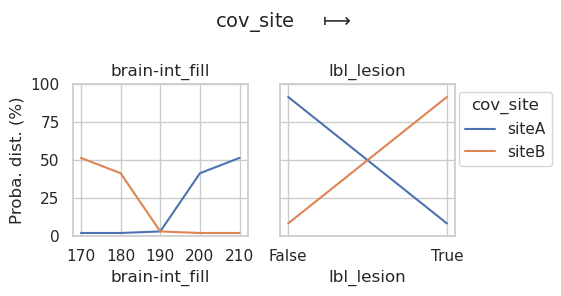

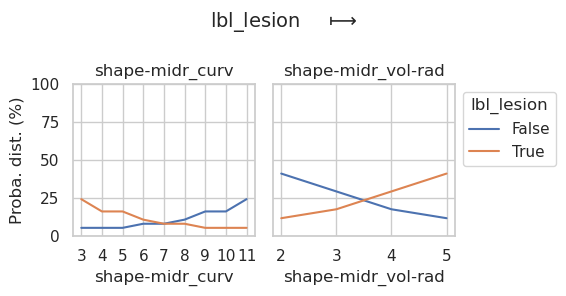

In [18]:
toy2 = ToyBrainsData("configs.lbl1cov1_midsignal")
_ = toy2.show_current_config()

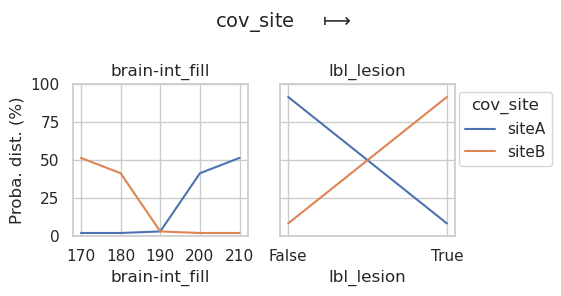

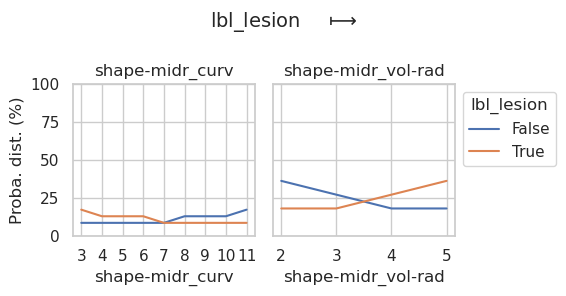

In [19]:
toy3 = ToyBrainsData("configs.lbl1cov1_lowsignal")
_ = toy3.show_current_config()

In [20]:
df2 = toy2.generate_dataset_table(n_samples=1000, outdir_suffix="n_midsignal")
df3 = toy3.generate_dataset_table(n_samples=1000, outdir_suffix="n_lowsignal")

Sampling n=1000 toybrain image settings


100%|##########| 1000/1000 [00:01<00:00, 524.14it/s]


Sampling n=1000 toybrain image settings


100%|##########| 1000/1000 [00:01<00:00, 540.32it/s]


In [21]:
df_results2 = toy2.fit_baseline_models(debug=False)
df_results3 = toy3.fit_baseline_models(debug=False)

running a total of 35 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000_midsignal


100%|##########| 35/35 [00:00<00:00, 42.38it/s]


TOTAL RUNTIME: 0:00:02
running a total of 35 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000_lowsignal


100%|##########| 35/35 [00:00<00:00, 46.17it/s]


TOTAL RUNTIME: 0:00:02


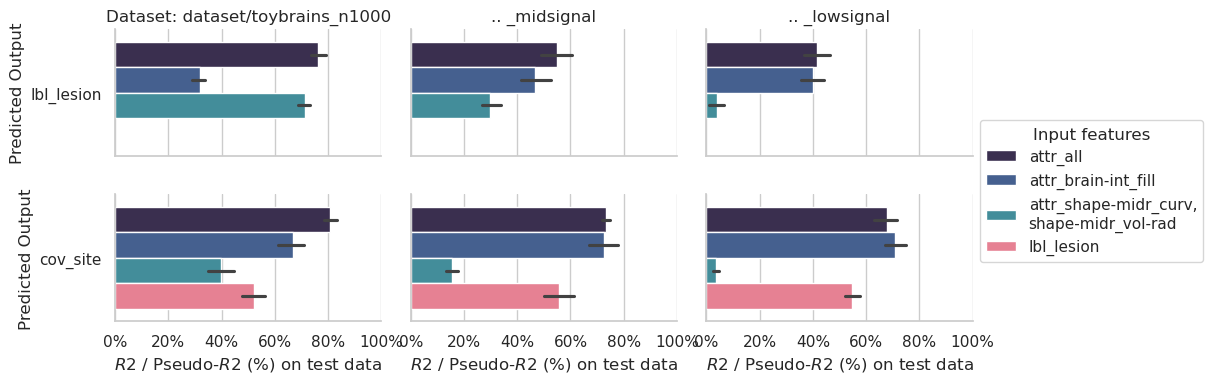

In [22]:
toy.viz_baseline_results([df_results, df_results2, df_results3])

Compare with another complex config dataset

Sampling n=1000 toybrain image settings


100%|##########| 1000/1000 [00:01<00:00, 502.38it/s]


running a total of 400 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000


100%|##########| 400/400 [00:20<00:00, 19.41it/s]


TOTAL RUNTIME: 0:00:23


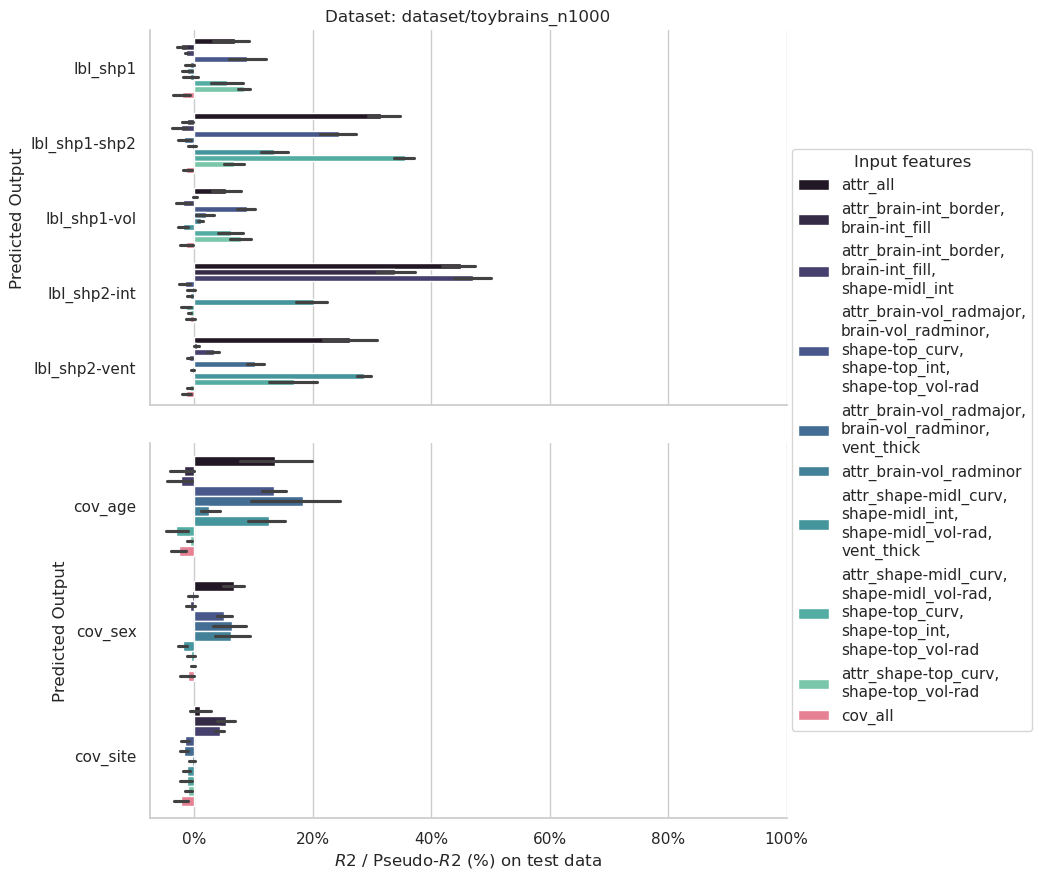

In [23]:
toy4 = ToyBrainsData(config='configs.lbl5cov3')
toy4.generate_dataset_table(1000, outdir_suffix="n_lbl5cov3")
df_results4 = toy4.fit_baseline_models()
toy4.viz_baseline_results(df_results4)

## (Step 4) Generate full dataset with images

In [8]:
toy.generate_dataset_images(n_jobs=10)
# toy2.generate_dataset_images(n_jobs=10)
# toy3.generate_dataset_images(n_jobs=10)

Generating n=1000 toybrain images


100%|##########| 1000/1000 [00:11<00:00, 86.84it/s]


Visualize some of the generated images

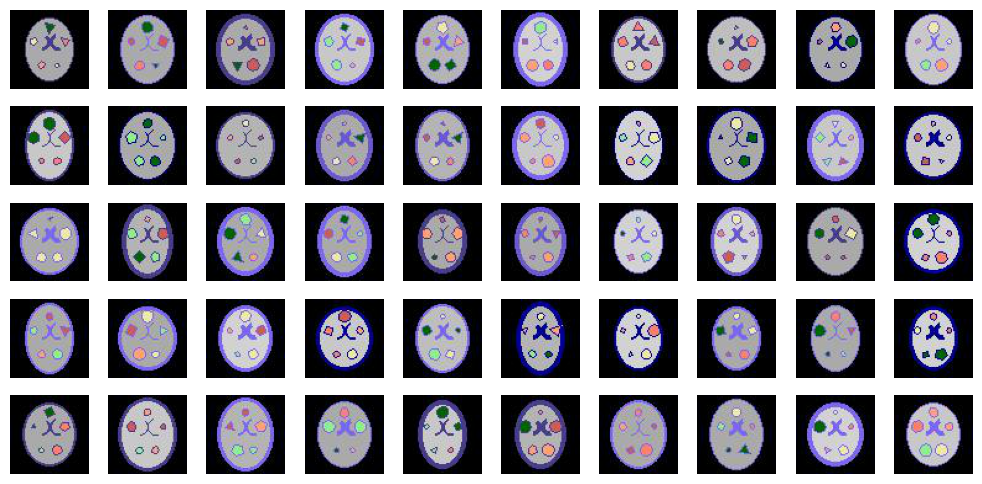

In [25]:
img_files = sorted(glob(f"{toy.OUT_DIR_SUF}/images/*.jpg"))
show_images(img_files=img_files, n_rows=5)

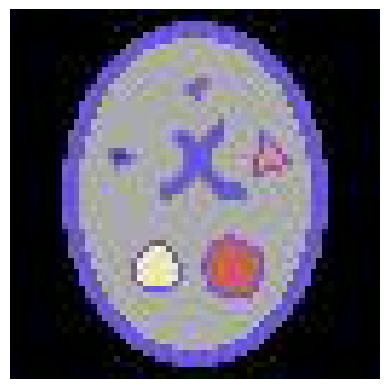

In [26]:
# one random image in detail
img_file = np.random.choice(img_files)
img = mpimg.imread(img_file)
f = plt.figure(frameon=False)
plt.imshow(img)
plt.axis('off')
# plt.savefig("docs/brain.png", bbox_inches='tight')
plt.show()

## Step 2 & 3 can be run together
with 
```python 
toy.generate_dataset(n_samples=1000)
```
that internally calls
```python 
toy.generate_dataset_table(n_samples=1000)
toy.generate_dataset_images()
```

Alternatively, toybrains dataset can be generated from the command line directly as follows:

In [27]:
# generating 100 samples with debug switch turned on
! python3 create_toybrains.py -c configs.lbl1cov1 -n 100 -d 

Generative parameter        |        States 
------------------------------------------------------------
brain-vol_radminor         [20 21 22 23 24]
brain-vol_radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain-int_fill             [210 200 190 180 170]
brain-int_border           ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg